### Imports

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Load Data In

In [58]:
## Load the data files into panda dataframes
features = ["Sample code number","Clump Thickness","Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"]
data_df = pd.read_csv(os.path.join(os.sys.path[0], "Breast_Cancer/breast-cancer-wisconsin.data"),delimiter=",", names=features, index_col=False)

### Inspect Data

In [59]:
## View some data from dataframe
print(data_df.head())

   Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

  Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0           1                3                1        1

In [60]:
## View information about dataframe
print(data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
None


In [61]:
## View basic statistics for each column
print(data_df.describe())

       Sample code number  Clump Thickness  Uniformity of Cell Size  \
count        6.990000e+02       699.000000               699.000000   
mean         1.071704e+06         4.417740                 3.134478   
std          6.170957e+05         2.815741                 3.051459   
min          6.163400e+04         1.000000                 1.000000   
25%          8.706885e+05         2.000000                 1.000000   
50%          1.171710e+06         4.000000                 1.000000   
75%          1.238298e+06         6.000000                 5.000000   
max          1.345435e+07        10.000000                10.000000   

       Uniformity of Cell Shape  Marginal Adhesion  \
count                699.000000         699.000000   
mean                   3.207439           2.806867   
std                    2.971913           2.855379   
min                    1.000000           1.000000   
25%                    1.000000           1.000000   
50%                    1.000000     

2    458
4    241
Name: Class, dtype: int64


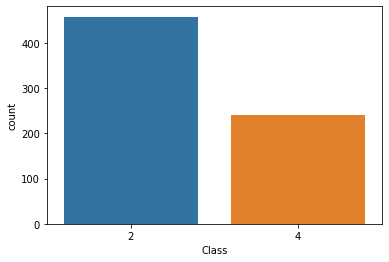

In [62]:
## Check distribution of benign or malignant
## 2 for benign, 4 for malignant
print(data_df["Class"].value_counts())
sns.countplot(x="Class", data=data_df)
plt.show()

### Clean Data

In [63]:
## Drop Sample code number column 
data_df.drop('Sample code number', inplace=True, axis=1)

In [64]:
## Replace all ? values in dataframe with null (as this is what they represent)
data_df = data_df.replace('?', np.nan)

In [65]:
## Interpolate to fill in missing values
## Use 'pad' method here as this fills with only existing values which avoids data type issues (e.g. int has decimal values etc.)
data_df = data_df.interpolate(method ='pad')

In [66]:
## Normalise the data using pandas, only normalise feature columns (specified)
data_df_norm = data_df.copy()
data_df_norm = data_df_norm_mean.astype(float)

col_names = ["Clump Thickness","Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses"]

norm_feat = data_df_norm[col_names]
norm_feat=(norm_feat-norm_feat.mean())/norm_feat.std()
data_df_norm[col_names] = norm_feat

print(data_df_norm)

     Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0           0.206788                -0.699494                 -0.742767   
1           0.206788                 0.283642                  0.266684   
2          -0.503505                -0.699494                 -0.742767   
3           0.561934                 1.594490                  1.612618   
4          -0.148359                -0.699494                 -0.742767   
..               ...                      ...                       ...   
694        -0.503505                -0.699494                 -0.742767   
695        -0.858651                -0.699494                 -0.742767   
696         0.206788                 2.249915                  2.285586   
697        -0.148359                 1.594490                  0.939651   
698        -0.148359                 1.594490                  1.612618   

     Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
0            -0.632794         

### Save the data

In [67]:
data_df.to_csv("./preprocessed_data/data.csv", index=False)
data_df_norm.to_csv("./preprocessed_data/norm_data_standardized.csv", index=False)